# Project Assignment - Image Classification Exploiting Sparsity

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_curve, precision_recall_curve, PrecisionRecallDisplay, roc_auc_score, RocCurveDisplay, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from math import isclose
from sklearn.metrics import mean_squared_error, r2_score

## Data Preparation

In [2]:
# reading data and converting to dataframe
data = pd.read_csv('Project_Data_EE4C12_CE_IMG.csv', header=None)
dataSet = pd.DataFrame(data)

In [3]:
dataSet

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8038,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8039,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8040,6,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8041,6,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# dropping row with missing values
dataSet.drop([8042], inplace=True)

In [5]:
dataSet

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8037,8,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8038,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8039,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8040,6,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
sorted_dataSet = dataSet.sort_values(by=dataSet.columns[0]).reset_index(drop=True)

In [7]:
sorted_dataSet

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8037,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8038,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8039,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8040,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# separating features and labels
Y_pd = sorted_dataSet[sorted_dataSet.columns[0]]
X_pd = sorted_dataSet.drop(sorted_dataSet.columns[0], axis=1)

In [9]:
# using numpy arrays instead of pandas dataframes
Y = Y_pd.to_numpy()
X = X_pd.to_numpy()

In [10]:
# function to display image from flattened array (784 -> 28x28)
def create_image(flatImage,imageSize=28):
    image = np.zeros((imageSize,imageSize))
    for i in range(imageSize):
        image[i] = flatImage[(i*imageSize):((i+1)*imageSize)]
    return image

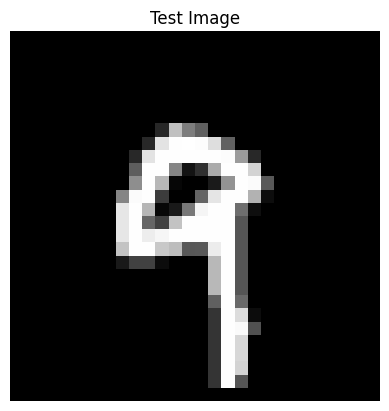

In [11]:
test_image =create_image(X[-1])
plt.imshow(test_image, cmap='gray')  # 'gray' ensures it's displayed in grayscale
plt.title("Test Image")
plt.axis('off')  # Hide axes for clarity
plt.show()

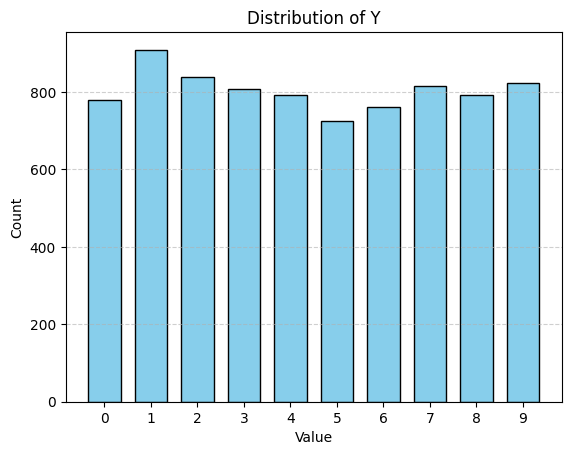

In [12]:
# plotting the amount of samples for each label:
unique, counts = np.unique(Y, return_counts=True)
bar_width = 0.7  # smaller value = more space between bars
plt.bar(unique, counts, width=bar_width, color='skyblue', edgecolor='black')
plt.title("Distribution of Y")
plt.xlabel("Value")
plt.ylabel("Count")
plt.xticks(unique)  # Show each integer on the x-axis
plt.grid(axis='y', linestyle='--', alpha=0.6)
# plt.savefig("data_histogram.png")
plt.show()

In [13]:
# normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# showing normalization on first 10 features:
print("Mean of X", np.nanmean(X[:10,:],axis=1))
print("Mean of X after z-score normalization", np.nanmean(X_scaled[:10,:],axis=1))

Mean of X [30.67091837 44.21938776 44.53571429 43.0497449  45.63265306 29.20408163
 48.41454082 40.35076531 35.55867347 40.59693878]
Mean of X after z-score normalization [-0.06450662  0.08808553  0.24134303  0.08349246  0.12537953 -0.04474379
  0.23884544  0.08935519 -0.00604107  0.05869696]


In [15]:
# train-test split
Test_ratio = 0.2
random_seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=Test_ratio, random_state=random_seed, stratify=Y)

## Model Training

In [16]:
def test_model(model,X,Y):
    Y_pred = model.predict(X)
    accuracy = accuracy_score(Y, Y_pred)
    cm = confusion_matrix(Y, Y_pred)
    return Y_pred, accuracy, cm

### Logistic Regression (Vanilla)

In [17]:
logisticReg = LogisticRegression(penalty=None, solver='saga', max_iter=1000, random_state=random_seed)
logisticReg.fit(X_train, Y_train)
Y_pred_logReg, accuracy_logReg, cm_logReg = test_model(logisticReg, X_test, Y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [18]:
print("Accuracy of logistic regression without regularization: ", accuracy_logReg)
print(classification_report(Y_test, Y_pred_logReg, target_names=[str(i) for i in range(10)]))

Accuracy of logistic regression without regularization:  0.8986948415164698
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       156
           1       0.93      0.98      0.95       182
           2       0.89      0.90      0.90       168
           3       0.91      0.83      0.87       162
           4       0.93      0.95      0.94       158
           5       0.82      0.83      0.83       145
           6       0.95      0.91      0.93       152
           7       0.87      0.89      0.88       163
           8       0.88      0.84      0.86       158
           9       0.89      0.88      0.89       165

    accuracy                           0.90      1609
   macro avg       0.90      0.90      0.90      1609
weighted avg       0.90      0.90      0.90      1609



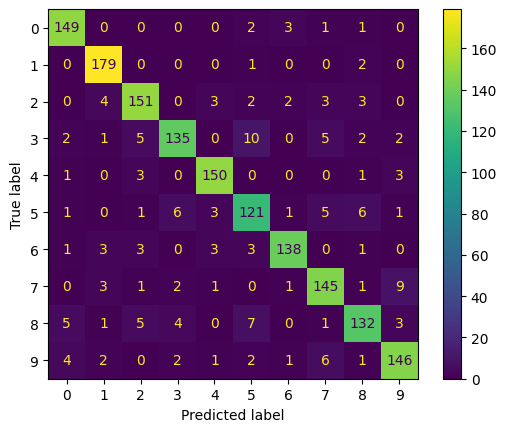

In [19]:
ConfusionMatrixDisplay(cm_logReg, display_labels=range(10)).plot()

In [ ]:
n_nonzero_logReg = np.sum(logisticReg.coef_ != 0)
sparsity_ratio_logReg = n_nonzero_logReg / logisticReg.coef_.size
print(f"Number of non-zero coefficients in Logistic Regression without regularization: {n_nonzero_logReg}")
print(f"Sparsity ratio in Logistic Regression without regularization: {sparsity_ratio_logReg:.4f}")

Number of non-zero coefficients in Logistic Regression without regularization: 6640
Sparsity ratio in Logistic Regression without regularization: 0.8469


### Logistic Regression (with L1 Regularization)

In [20]:
# N = 100
eps = 1e-4
C_list = np.logspace(-3, 2, 6)
best_model = []
best_accuracy = 0
for c_value in C_list:
	logisticReg = LogisticRegression(penalty='l1', solver='saga', max_iter=1000, random_state=random_seed, C=c_value)
	logisticReg.fit(X_train, Y_train)
	Y_pred,accuracy,cm = test_model(logisticReg, X_test, Y_test)
	if accuracy>best_accuracy +eps:
		best_accuracy=accuracy
		best_model = [Y_pred,accuracy,cm,c_value]
print("Accuracy of best model: ",best_model[1])
print("C value of best model: ",best_model[3])

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy of best model:  0.8993163455562461
C value of best model:  1.0


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
logisticReg_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=1000, random_state=random_seed, C=1.0)
logisticReg_l1.fit(X_train, Y_train)
Y_pred_logReg_l1, accuracy_logReg_l1, cm_logReg_l1 = test_model(logisticReg_l1, X_test, Y_test)

C:\Users\kunal\anaconda3\envs\MLforEE\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [21]:
print("Accuracy of logistic regression with L1 regularization: ", best_model[1])
print(classification_report(Y_test, best_model[0], target_names=[str(i) for i in range(10)]))

Accuracy of logistic regression with L1 regularization:  0.8993163455562461
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       156
           1       0.93      0.98      0.95       182
           2       0.90      0.89      0.90       168
           3       0.91      0.83      0.87       162
           4       0.93      0.95      0.94       158
           5       0.82      0.83      0.82       145
           6       0.94      0.90      0.92       152
           7       0.87      0.90      0.88       163
           8       0.87      0.84      0.86       158
           9       0.90      0.88      0.89       165

    accuracy                           0.90      1609
   macro avg       0.90      0.90      0.90      1609
weighted avg       0.90      0.90      0.90      1609



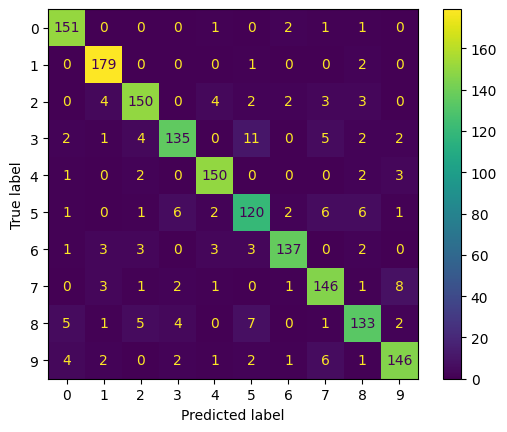

In [22]:
ConfusionMatrixDisplay(best_model[2], display_labels=range(10)).plot()

In [ ]:
n_nonzero_logReg_l1 = np.sum(logisticReg_l1.coef_ != 0)
sparsity_ratio_logReg_l1 = n_nonzero_logReg_l1 / logisticReg_l1.coef_.size
print(f"Number of non-zero coefficients in Logistic Regression with L1 regularization: {n_nonzero_logReg_l1}")
print(f"Sparsity ratio in Logistic Regression with L1 regularization: {sparsity_ratio_logReg_l1:.4f}")

Number of non-zero coefficients in Logistic Regression with L1 regularization: 4227
Sparsity ratio in Logistic Regression with L1 regularization: 0.5392


### Linear Support Vector Machine

In [41]:
linear_svc = LinearSVC(
    C = 1.0,
    penalty = 'l2',
    dual = False,
    max_iter = 5000,
    random_state = 42,
    verbose = 1
)
linear_svc.fit(X_train, Y_train)
Y_pred_linSVC, accuracy_linSVC, cm_linSVC = test_model(linear_svc, X_test, Y_test)

[LibLinear]

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [42]:
print("Accuracy of linear support vector machine: ", accuracy_linSVC)
print(classification_report(Y_test, Y_pred_linSVC, target_names=[str(i) for i in range(10)]))

Accuracy of linear support vector machine:  0.8440024860161591
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       156
           1       0.94      0.98      0.96       182
           2       0.82      0.81      0.81       168
           3       0.84      0.80      0.82       162
           4       0.84      0.91      0.87       158
           5       0.77      0.73      0.75       145
           6       0.91      0.85      0.88       152
           7       0.87      0.85      0.86       163
           8       0.77      0.73      0.75       158
           9       0.80      0.82      0.81       165

    accuracy                           0.84      1609
   macro avg       0.84      0.84      0.84      1609
weighted avg       0.84      0.84      0.84      1609



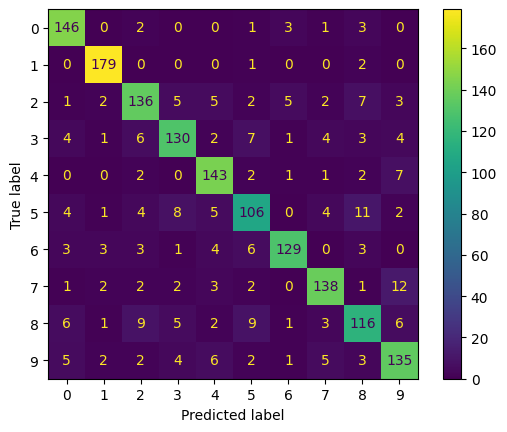

In [43]:
ConfusionMatrixDisplay(cm_linSVC, display_labels=range(10)).plot()

### Gradient Boosted Tree

In [24]:
gradientBoost = GradientBoostingClassifier(random_state=42)
gradientBoost.fit(X_train, Y_train)
Y_pred_gradBoost, accuracy_gradBoost, cm_gradBoost = test_model(gradientBoost, X_test, Y_test)

In [25]:
print("Accuracy of gradient boosted tree with default parameters: ", accuracy_gradBoost)
print(classification_report(Y_test, Y_pred_gradBoost, target_names=[str(i) for i in range(10)]))

Accuracy of gradient boosted tree with default parameters:  0.9154754505904288
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       156
           1       0.95      0.99      0.97       182
           2       0.91      0.92      0.91       168
           3       0.88      0.85      0.87       162
           4       0.94      0.92      0.93       158
           5       0.91      0.91      0.91       145
           6       0.93      0.90      0.92       152
           7       0.88      0.91      0.89       163
           8       0.89      0.89      0.89       158
           9       0.91      0.88      0.89       165

    accuracy                           0.92      1609
   macro avg       0.91      0.91      0.91      1609
weighted avg       0.92      0.92      0.92      1609



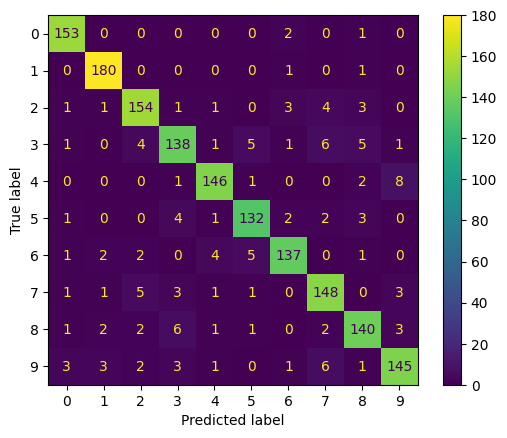

In [29]:
ConfusionMatrixDisplay(cm_gradBoost, display_labels=range(10)).plot()

#### Selecting Parameters through Cross-Validation

In [28]:
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}
grid_search_gb = GridSearchCV(
    gradientBoost,
    param_grid_gb,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)
grid_search_gb.fit(X_train, Y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


KeyboardInterrupt: 

In [ ]:
print("Best parameters:", grid_search_gb.best_params_)
print("Best cross-val accuracy:", grid_search_gb.best_score_)

In [ ]:
best_gradBoost = grid_search_gb.best_estimator_
Y_pred_gradBoost_best, accuracy_gradBoost_best, cm_gradBoost_best = test_model(best_gradBoost, X_test, Y_test)

In [ ]:
print("Accuracy of gradient boosted tree with best parameters: ", accuracy_gradBoost_best)
print(classification_report(Y_test, Y_pred_gradBoost_best, target_names=[str(i) for i in range(10)]))

### Histogram-Based Gradient Boosting Tree

In [31]:
histGradBoost = HistGradientBoostingClassifier(random_state=42)
histGradBoost.fit(X_train, Y_train)
Y_pred_hGradBoost, accuracy_hGradBoost, cm_hGradBoost = test_model(histGradBoost, X_test, Y_test)

In [32]:
print("Accuracy of histogram-based gradient boosted tree with default parameters: ", accuracy_hGradBoost)
print(classification_report(Y_test, Y_pred_hGradBoost, target_names=[str(i) for i in range(10)]))

Accuracy of histogram-based gradient boosted tree with default parameters:  0.949658172778123
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       156
           1       0.97      0.99      0.98       182
           2       0.96      0.93      0.95       168
           3       0.93      0.93      0.93       162
           4       0.96      0.95      0.96       158
           5       0.96      0.92      0.94       145
           6       0.96      0.93      0.95       152
           7       0.93      0.95      0.94       163
           8       0.91      0.97      0.94       158
           9       0.95      0.92      0.94       165

    accuracy                           0.95      1609
   macro avg       0.95      0.95      0.95      1609
weighted avg       0.95      0.95      0.95      1609



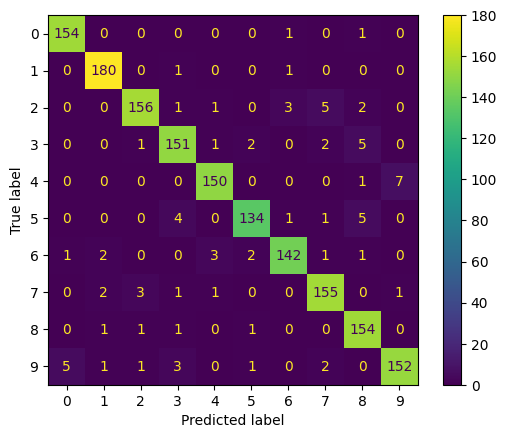

In [33]:
ConfusionMatrixDisplay(cm_hGradBoost, display_labels=range(10)).plot()

### Multi-Layer Perceptron (Fully Connected Neural Network)

In [37]:
mlp = MLPClassifier(
    hidden_layer_sizes=(256,128),
    activation='relu',
    solver='adam',
    alpha = 1e-4,
    batch_size = 64,
    learning_rate_init = 1e-3,
    max_iter = 50,
    random_state = 42,
    verbose = True
)
mlp.fit(X_train,Y_train)
Y_pred_mlp, accuracy_mlp, cm_mlp = test_model(mlp,X_test,Y_test)

Iteration 1, loss = 0.50798214
Iteration 2, loss = 0.13556291
Iteration 3, loss = 0.06486400
Iteration 4, loss = 0.03292221
Iteration 5, loss = 0.01430280
Iteration 6, loss = 0.00636608
Iteration 7, loss = 0.00418599
Iteration 8, loss = 0.00326256
Iteration 9, loss = 0.00253942
Iteration 10, loss = 0.00206454
Iteration 11, loss = 0.00175511
Iteration 12, loss = 0.00154516
Iteration 13, loss = 0.00136280
Iteration 14, loss = 0.00123593
Iteration 15, loss = 0.00113546
Iteration 16, loss = 0.00105572
Iteration 17, loss = 0.00098383
Iteration 18, loss = 0.00092873
Iteration 19, loss = 0.00087853
Iteration 20, loss = 0.00083886
Iteration 21, loss = 0.00080230
Iteration 22, loss = 0.00077113
Iteration 23, loss = 0.00074615
Iteration 24, loss = 0.00072081
Iteration 25, loss = 0.00070042
Iteration 26, loss = 0.00068310
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [38]:
print("Accuracy of fully connected neural network: ", accuracy_mlp)
print(classification_report(Y_test, Y_pred_mlp, target_names=[str(i) for i in range(10)]))

Accuracy of fully connected neural network:  0.9552517091361094
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       156
           1       0.96      1.00      0.98       182
           2       0.95      0.98      0.96       168
           3       0.94      0.95      0.94       162
           4       0.96      0.98      0.97       158
           5       0.93      0.94      0.94       145
           6       0.97      0.94      0.95       152
           7       0.95      0.91      0.93       163
           8       0.97      0.94      0.96       158
           9       0.97      0.92      0.94       165

    accuracy                           0.96      1609
   macro avg       0.96      0.95      0.95      1609
weighted avg       0.96      0.96      0.96      1609



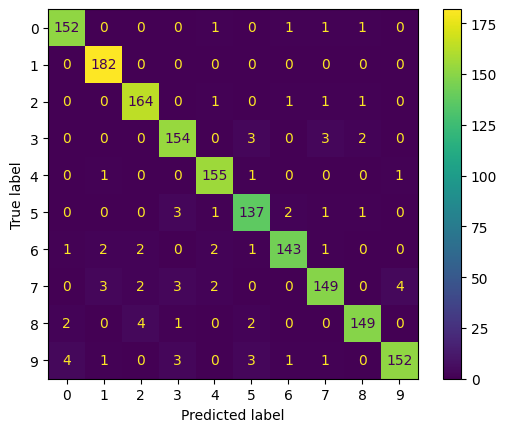

In [39]:
ConfusionMatrixDisplay(cm_mlp, display_labels=range(10)).plot()